# Модуль 1

## 1.1 Парсинг данных

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpt

import warnings
warnings.filterwarnings('ignore')

In [124]:
# Выполняем загрузку данных
data = pd.read_excel('owid-covid-data.xlsx')

In [125]:
data.head(4)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [126]:
# Собираем техническую информацию
print(f"Размер набора данных: {data.shape}")

Размер набора данных: (121034, 65)


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121034 entries, 0 to 121033
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code                                 121034 non-null  object 
 1   continent                                115519 non-null  object 
 2   location                                 121034 non-null  object 
 3   date                                     121034 non-null  object 
 4   total_cases                              114912 non-null  float64
 5   new_cases                                114909 non-null  float64
 6   new_cases_smoothed                       113894 non-null  float64
 7   total_deaths                             104123 non-null  float64
 8   new_deaths                               104278 non-null  float64
 9   new_deaths_smoothed                      113894 non-null  float64
 10  total_cases_per_million         

## 1.2 Предобработка данных и выделение значимых атрибутов

In [145]:
# Посмотрм на отсутствующие значения
def mising():
    mis = pd.DataFrame(data.isnull().sum(), columns=['кол-во пропусков'])
    poc = pd.DataFrame(data.isnull().sum()/data.shape[0], columns=['% пропусков'])
    mis = pd.concat([mis, poc], axis=1)
    pd.set_option('display.max_rows', None)
    print(mis)
mising()

                                       кол-во пропусков  % пропусков
iso_code                                              0     0.000000
continent                                          5515     0.045566
location                                              0     0.000000
date                                                  0     0.000000
total_cases                                        6122     0.050581
new_cases                                          6125     0.050606
new_cases_smoothed                                 7140     0.058992
total_deaths                                      16911     0.139721
new_deaths                                        16756     0.138440
new_deaths_smoothed                                7140     0.058992
total_cases_per_million                            6727     0.055579
new_cases_per_million                              6730     0.055604
new_cases_smoothed_per_million                     7740     0.063949
total_deaths_per_million          

Мы можем наблюдоть что у некоторых признаков отсутствует больше 70% данных. Такие столбцы можно удалить

In [146]:
irretrievable_cols = list()
for column in data.columns:
    if data[column].isnull().sum() / data.shape[0] * 100 > 70:
        irretrievable_cols.append(column)
print(f"Невосстановимые признаки, у которых пропусков более 70%: {irretrievable_cols}")

Невосстановимые признаки, у которых пропусков более 70%: []


In [147]:
# Удалим эти признаки
data.drop(columns=irretrievable_cols, inplace=True)

# Посмотрим на размер оставшихся данных
data.shape

(121034, 44)

In [148]:
# Пропуски в оставшихся данных
mising()

                                       кол-во пропусков  % пропусков
iso_code                                              0     0.000000
continent                                          5515     0.045566
location                                              0     0.000000
date                                                  0     0.000000
total_cases                                        6122     0.050581
new_cases                                          6125     0.050606
new_cases_smoothed                                 7140     0.058992
total_deaths                                      16911     0.139721
new_deaths                                        16756     0.138440
new_deaths_smoothed                                7140     0.058992
total_cases_per_million                            6727     0.055579
new_cases_per_million                              6730     0.055604
new_cases_smoothed_per_million                     7740     0.063949
total_deaths_per_million          

In [149]:
data.head(35).T

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
iso_code,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,...,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG
continent,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,...,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia
location,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,...,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
date,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,...,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29
total_cases,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,24.0,24.0,34.0,40.0,42.0,74.0,80.0,91.0,106.0,114.0
new_cases,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.0,0.0,10.0,6.0,2.0,32.0,6.0,11.0,15.0,8.0
new_cases_smoothed,NaN,NaN,NaN,NaN,NaN,0.714,0.714,0.0,0.0,0.0,...,1.857,1.429,2.0,2.143,2.286,6.857,7.714,9.571,11.714,11.429
total_deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,1.0,2.0,2.0,2.0,4.0
new_deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,2.0
new_deaths_smoothed,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.143,0.143,0.143,0.286,0.286,0.286,0.571


Заполним пустые числовые значения нулями

In [150]:
data_num = data.drop(columns=['iso_code', 'continent', 'location', 'date', 'tests_units'])
df = df.dropna()
for col in data_num.columns:
    data_num[col] = data_num[col].fillna(0)
data_num.isnull().sum()

total_cases                              0
new_cases                                0
new_cases_smoothed                       0
total_deaths                             0
new_deaths                               0
new_deaths_smoothed                      0
total_cases_per_million                  0
new_cases_per_million                    0
new_cases_smoothed_per_million           0
total_deaths_per_million                 0
new_deaths_per_million                   0
new_deaths_smoothed_per_million          0
reproduction_rate                        0
new_tests                                0
total_tests                              0
total_tests_per_thousand                 0
new_tests_per_thousand                   0
new_tests_smoothed                       0
new_tests_smoothed_per_thousand          0
positive_rate                            0
tests_per_case                           0
new_vaccinations_smoothed                0
new_vaccinations_smoothed_per_million    0
stringency_

Из оставшихся объектовах зачений нам нужны только tests_units. Заполним пропуски у tests_units.

In [151]:

t_u = data['tests_units']

Заполним пропуски наиболее повторяющимся значением и закодируем их

In [152]:
t_u.fillna(data['tests_units'].mode()[0], inplace =True)
data_num['tests_units'] = t_u


In [154]:
data_new = pd.get_dummies(data_num, columns=['tests_units'])
data_new.head(4)


,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,tests_units_people tested,tests_units_samples tested,tests_units_tests performed,tests_units_units unclear
0,5.0,5.0,0.0,0.0,0.0,0.0,0.126,0.126,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,False,False,True,False
1,5.0,0.0,0.0,0.0,0.0,0.0,0.126,0.000,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,False,False,True,False
2,5.0,0.0,0.0,0.0,0.0,0.0,0.126,0.000,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,False,False,True,False
3,5.0,0.0,0.0,0.0,0.0,0.0,0.126,0.000,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,False,False,True,False


# 1.3 Формирование новых признаков

Сформируйте отдельный атрибут, в которых будет содержаться анализ распространения вируса с помощью коэффициента распространения инфекции (Rt = число зарегистрированных заболеваний за последние 4 дня / число зарегистрированных заболеваний за предыдущие 4 дня). Проанализируйте возможность определения изменения эпидемиологической ситуации, используя сформированный атрибут.

Добавим в данные столбец iso_code для помощи в формиловании нового атрибута

In [168]:
# Вычисляем число зарегистрированных заболеваний за последние 4 дня
data_new['new_cases_4d'] = data_new['new_cases'].rolling(window=4).sum()

# Вычисляем число зарегистрированных заболеваний за предыдущие 4 дня
data_new['new_cases_prev_4d'] = data_new['new_cases_4d'].shift(4)

# Вычисляем коэффициент распространения инфекции (Rt)
data_new['Rt'] = data_new['new_cases_4d'] / data_new['new_cases_prev_4d']

In [169]:
data_new.head(35)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,hospital_beds_per_thousand,life_expectancy,human_development_index,tests_units_people tested,tests_units_samples tested,tests_units_tests performed,tests_units_units unclear,new_cases_4d,new_cases_prev_4d,Rt
0,5.0,5.0,0.000,0.0,0.0,0.000,0.126,0.126,0.000,0.000,...,0.5,64.83,0.511,False,False,True,False,NaN,NaN,NaN
1,5.0,0.0,0.000,0.0,0.0,0.000,0.126,0.000,0.000,0.000,...,0.5,64.83,0.511,False,False,True,False,NaN,NaN,NaN
2,5.0,0.0,0.000,0.0,0.0,0.000,0.126,0.000,0.000,0.000,...,0.5,64.83,0.511,False,False,True,False,NaN,NaN,NaN
3,5.0,0.0,0.000,0.0,0.0,0.000,0.126,0.000,0.000,0.000,...,0.5,64.83,0.511,False,False,True,False,5.0,NaN,NaN
4,5.0,0.0,0.000,0.0,0.0,0.000,0.126,0.000,0.000,0.000,...,0.5,64.83,0.511,False,False,True,False,0.0,NaN,NaN
5,5.0,0.0,0.714,0.0,0.0,0.000,0.126,0.000,0.018,0.000,...,0.5,64.83,0.511,False,False,True,False,0.0,NaN,NaN
6,5.0,0.0,0.714,0.0,0.0,0.000,0.126,0.000,0.018,0.000,...,0.5,64.83,0.511,False,False,True,False,0.0,NaN,NaN
7,5.0,0.0,0.000,0.0,0.0,0.000,0.126,0.000,0.000,0.000,...,0.5,64.83,0.511,False,False,True,False,0.0,5.0,0.000000
8,5.0,0.0,0.000,0.0,0.0,0.000,0.126,0.000,0.000,0.000,...,0.5,64.83,0.511,False,False,True,False,0.0,0.0,NaN
9,5.0,0.0,0.000,0.0,0.0,0.000,0.126,0.000,0.000,0.000,...,0.5,64.83,0.511,False,False,True,False,0.0,0.0,NaN


In [176]:
# посмотрим на наличие бесконечностей
inf_count = np.isinf(data_new).values.sum() 
col_name = data_new.columns.to_series()[np.isinf(data_new).any()]
print(inf_count, col_name)



3547 Rt    Rt
dtype: object


In [179]:
#преобразуем inf  в nan
data_new['Rt'].replace([np.inf, -np.inf], np.nan, inplace=True)

In [181]:
# заполним пропуски 0
for col in data_new.columns:
    data_new[col] = data_new[col].fillna(0)
data_new.isnull().sum()

total_cases                              0
new_cases                                0
new_cases_smoothed                       0
total_deaths                             0
new_deaths                               0
new_deaths_smoothed                      0
total_cases_per_million                  0
new_cases_per_million                    0
new_cases_smoothed_per_million           0
total_deaths_per_million                 0
new_deaths_per_million                   0
new_deaths_smoothed_per_million          0
reproduction_rate                        0
new_tests                                0
total_tests                              0
total_tests_per_thousand                 0
new_tests_per_thousand                   0
new_tests_smoothed                       0
new_tests_smoothed_per_thousand          0
positive_rate                            0
tests_per_case                           0
new_vaccinations_smoothed                0
new_vaccinations_smoothed_per_million    0
stringency_

In [183]:
data_new.head(4)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,hospital_beds_per_thousand,life_expectancy,human_development_index,tests_units_people tested,tests_units_samples tested,tests_units_tests performed,tests_units_units unclear,new_cases_4d,new_cases_prev_4d,Rt
0,5.0,5.0,0.0,0.0,0.0,0.0,0.126,0.126,0.0,0.0,...,0.5,64.83,0.511,False,False,True,False,0.0,0.0,0.0
1,5.0,0.0,0.0,0.0,0.0,0.0,0.126,0.000,0.0,0.0,...,0.5,64.83,0.511,False,False,True,False,0.0,0.0,0.0
2,5.0,0.0,0.0,0.0,0.0,0.0,0.126,0.000,0.0,0.0,...,0.5,64.83,0.511,False,False,True,False,0.0,0.0,0.0
3,5.0,0.0,0.0,0.0,0.0,0.0,0.126,0.000,0.0,0.0,...,0.5,64.83,0.511,False,False,True,False,5.0,0.0,0.0


Создадим целевой атрибут

In [188]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data_scaled = StandardScaler().fit_transform(data_new)

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

In [200]:
target = pd.DataFrame(clusters, columns=['target'])
data_all=pd.concat([data_new, target], axis=1)
data_all.head(4).T

,0,1,2,3
total_cases,5.0,5.0,5.0,5.0
new_cases,5.0,0.0,0.0,0.0
new_cases_smoothed,0.0,0.0,0.0,0.0
total_deaths,0.0,0.0,0.0,0.0
new_deaths,0.0,0.0,0.0,0.0
new_deaths_smoothed,0.0,0.0,0.0,0.0
total_cases_per_million,0.126,0.126,0.126,0.126
new_cases_per_million,0.126,0.0,0.0,0.0
new_cases_smoothed_per_million,0.0,0.0,0.0,0.0
total_deaths_per_million,0.0,0.0,0.0,0.0


# 1.4 Описание атрибутов и их распределение

Всего насчитывается 46 атрибутов:

    1)Атрибуты информирующие о заражении:
        total_cases - всего зараженных                          
        new_cases - навые слечаи заражения                                
        new_cases_smoothed - сглаженная средняя новых случаев заражения
        total_cases_per_million - всего заражённых на миллион                
        new_cases_per_million - новые случаи заражения на миллион                  
        new_cases_smoothed_per_million - сглаженная средняя новых случаев заражения на миллион
        new_cases_4d - кол-во новых случаев заражегия за последние 4 дня                            
        new_cases_prev_4d - количества новых случаев заражения за предыдущие 4 дня                     
        Rt - коэф. распространнения инфекции
        positive_rate - процент выздоровления
    2)О смертях:
        total_deaths - всего смертей
        new_deaths - новые случаи смертей
        new_deaths_smoothed - сглаженная средняя новых случаев смертей
        total_deaths_per_million - всего смертей на миллион 
        new_deaths_per_million - новых случаев смерти на миллион
        new_deaths_smoothed_per_million сглаженная средняя новых случаев смерти на миллион
    3)о тестах:
        new_tests - проведенно новых тестов
        total_tests - всего проверенных
        total_tests_per_thousand - всего проверенных на тысячу
        new_tests_per_thousand новых проверреных на тысячу
        new_tests_smoothed - средняя сглаженная новых преверенных
        new_tests_smoothed_per_thousand - средняя сглаженная новых преверенных на тысячу
        tests_per_case - количество тестов на случай заражения
        tests_units_people tested - вид теста "люди протестированны"
        tests_units_samples tested - вид теста "простые испытания"
        tests_units_tests performed - вид теста "Истыпания проведенны
        tests_units_units unclear - вид теста "Непонятные данные"   
    4)информация о населении и вакцинации
        new_vaccinations_smoothed - средняя сглаженная новых случаев вакцинации
        new_vaccinations_smoothed_per_million - средняя сглаженная новых случаев вакцинации на миллион
        stringency_index - индекс борьбы с короновирусом. от 0 до 100 где 100 это самые жестокие меры
        population - население
        population_density - плотность населения
        median_age - стредний возраст
        aged_65_older - процент людей старщих 65 лет
        aged_70_older - процент людей старщих 70 лет
        gdp_per_capita - ввп на душу насиления
        extreme_poverty - процент крайней бедности
        cardiovasc_death_rate - процент смертности от сердечто сосудистых заболеваний
        diabetes_prevalence - процент населения страдающих диабетом
        female_smokers - процент курящих женщин
        male_smokers- процент курящих мужчин
        handwashing_facilities - процент населения моющих руки
        hospital_beds_per_thousand количество больничных мест на тысячу
        life_expectancy - ожидаемая продолжительность жизни       
        human_development_index - индекс развития человека 

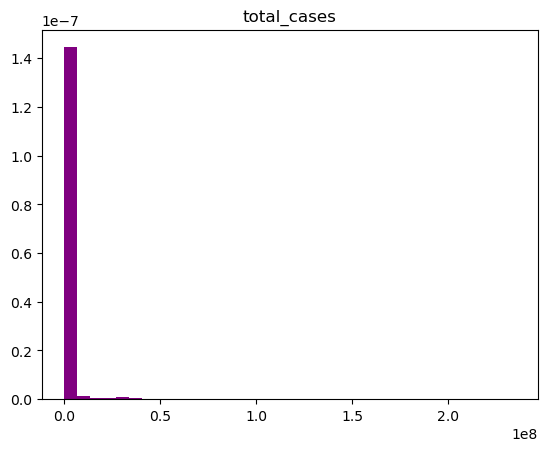

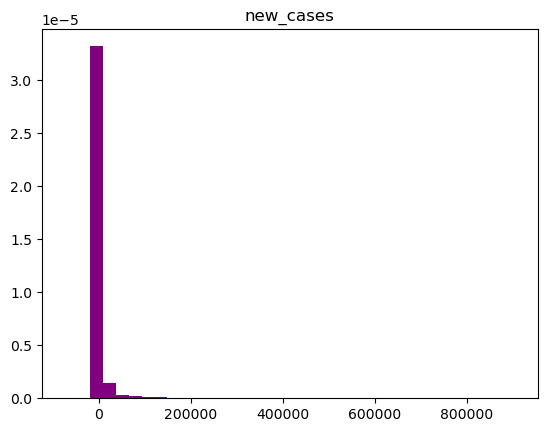

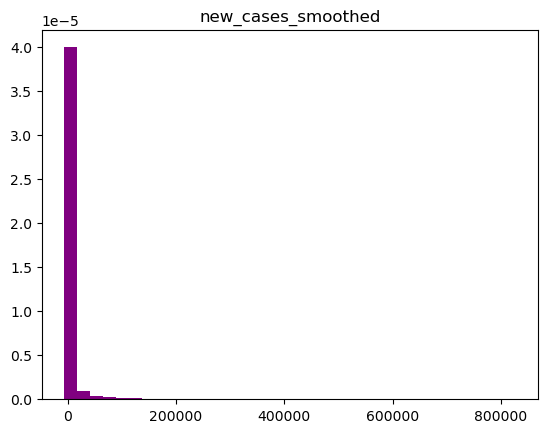

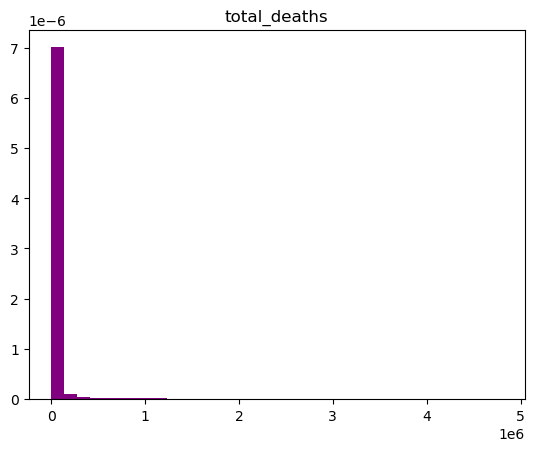

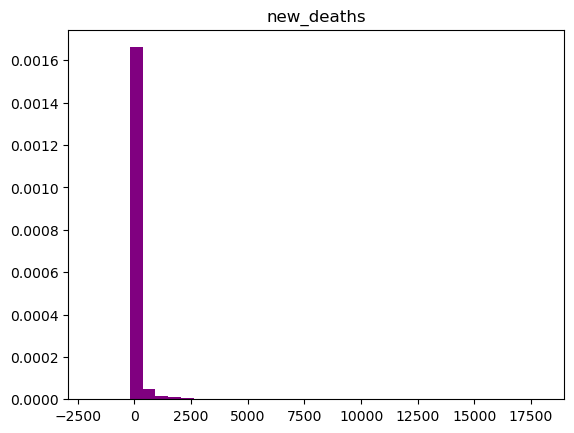

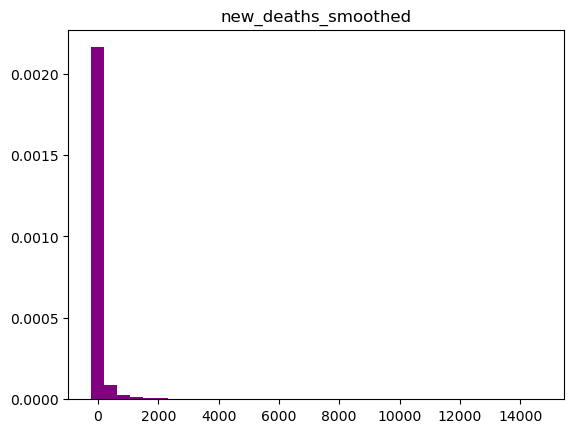

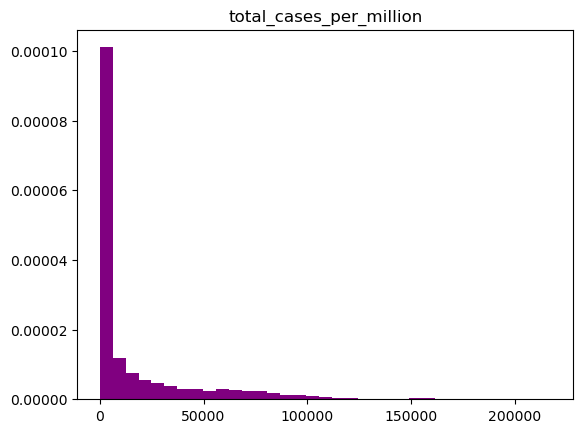

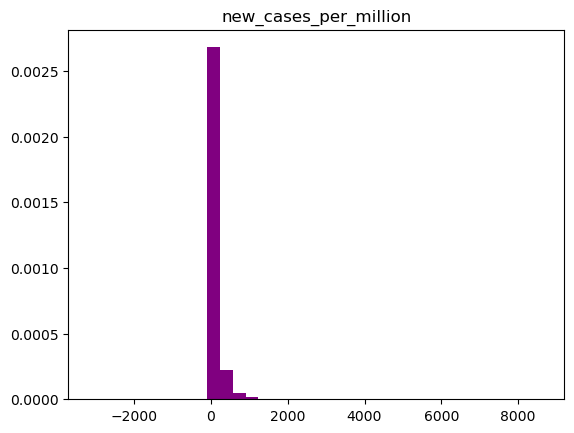

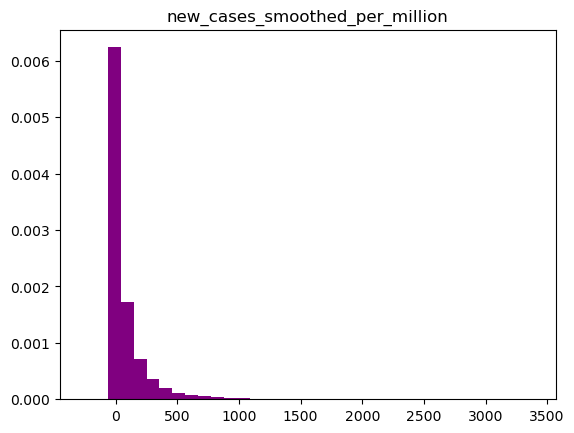

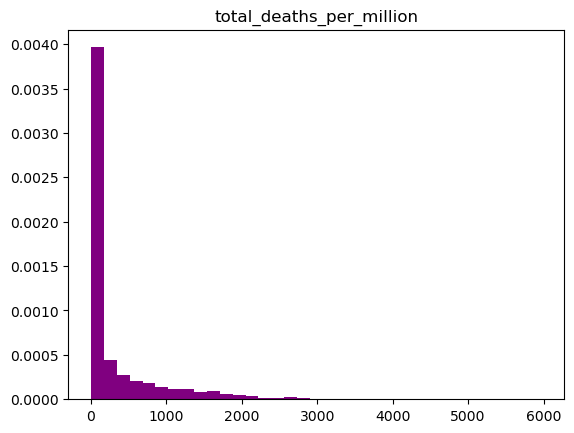

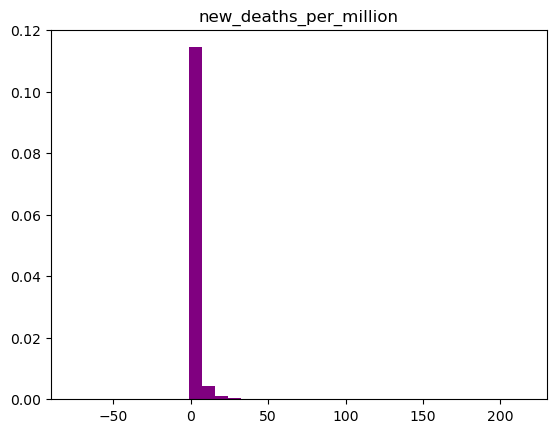

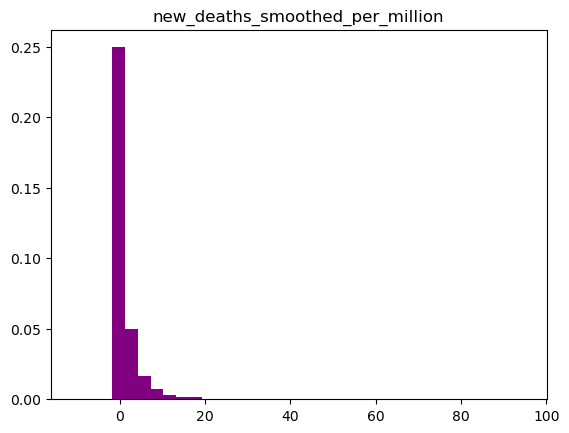

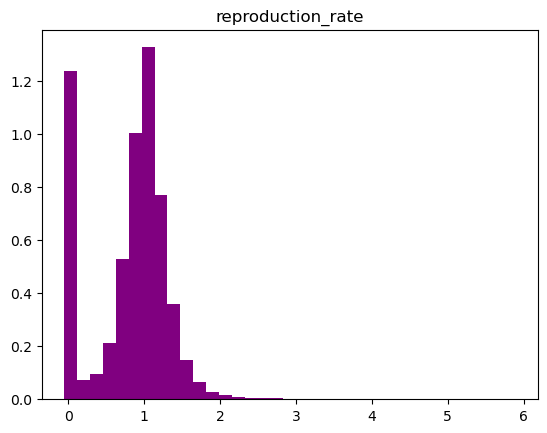

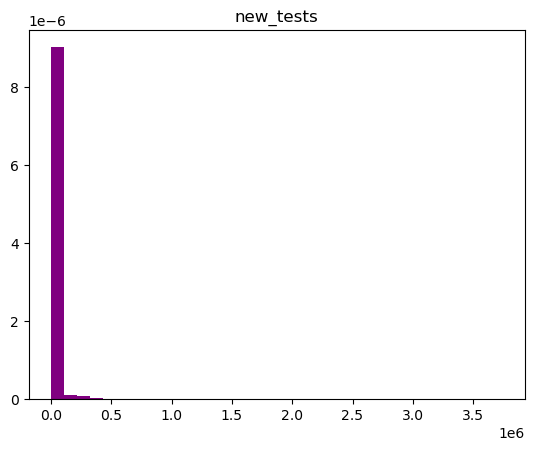

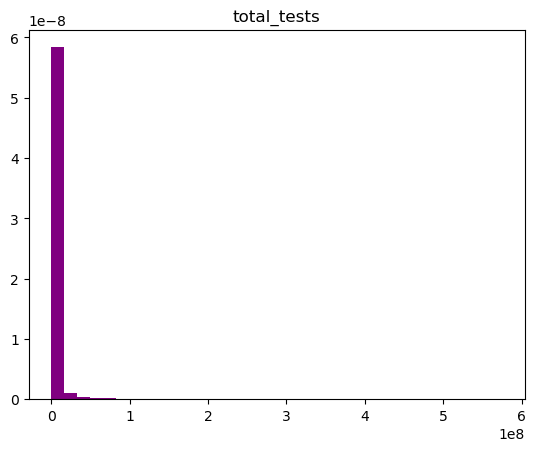

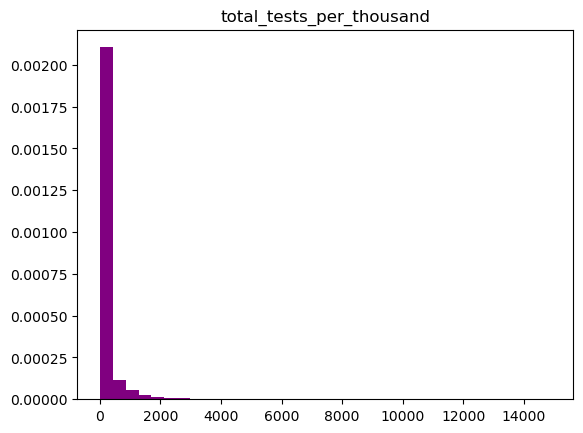

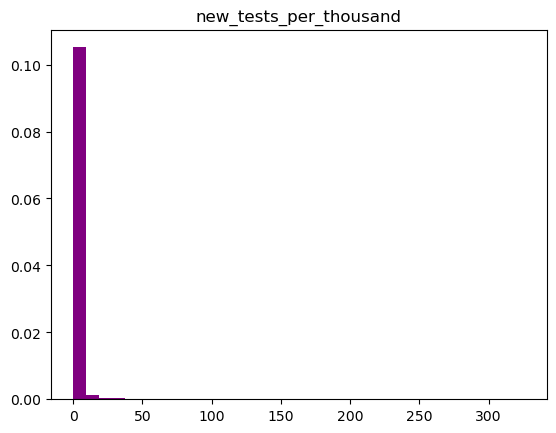

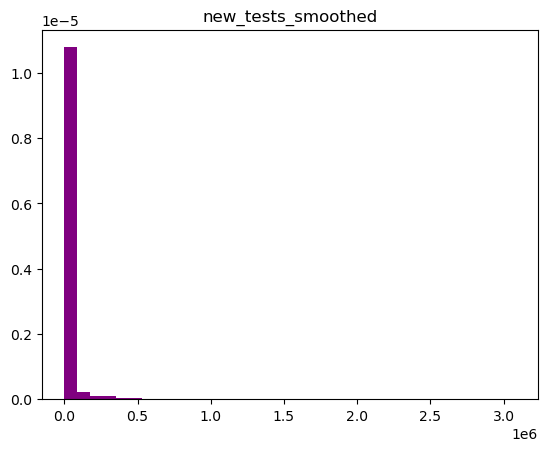

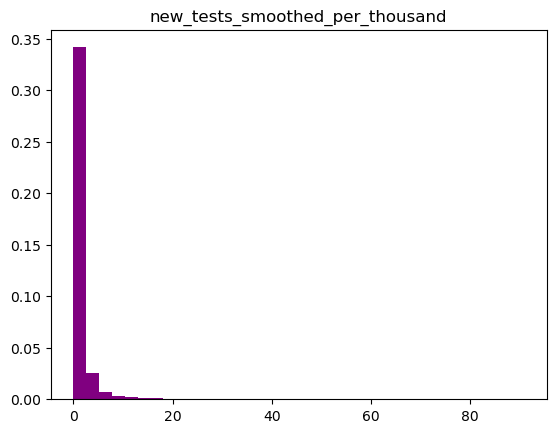

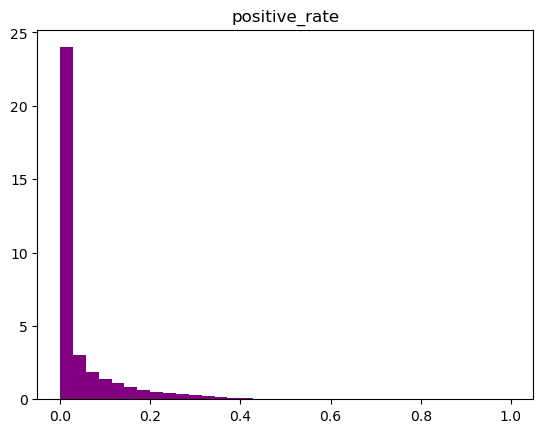

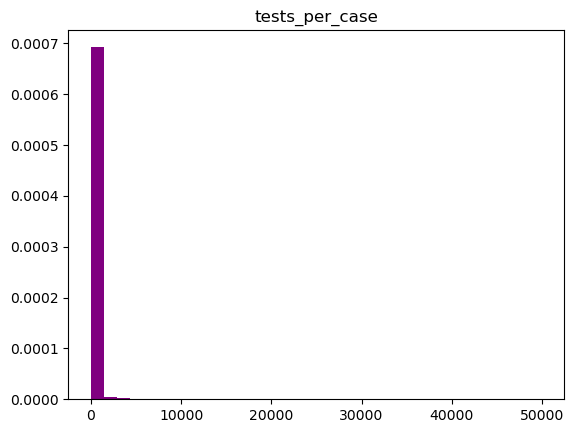

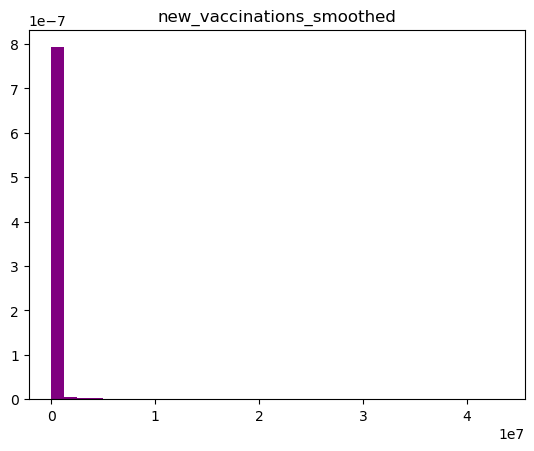

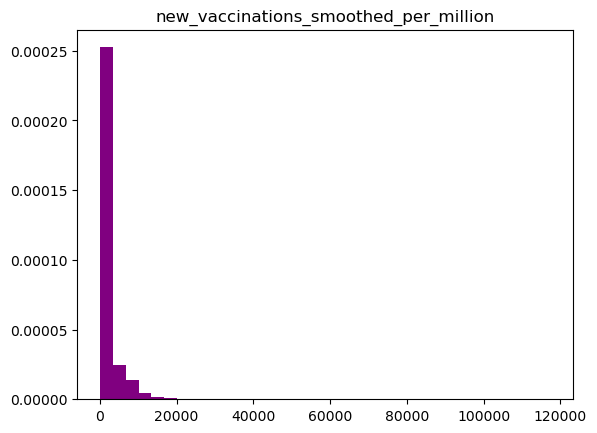

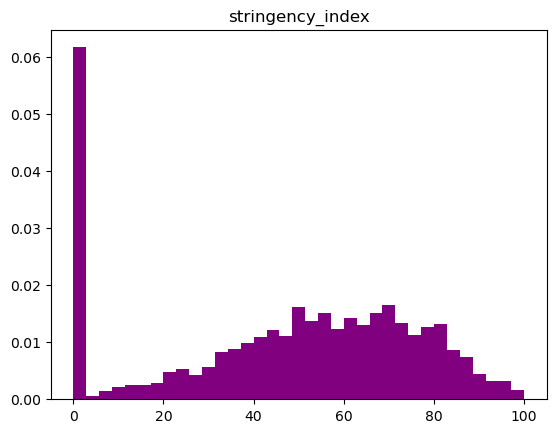

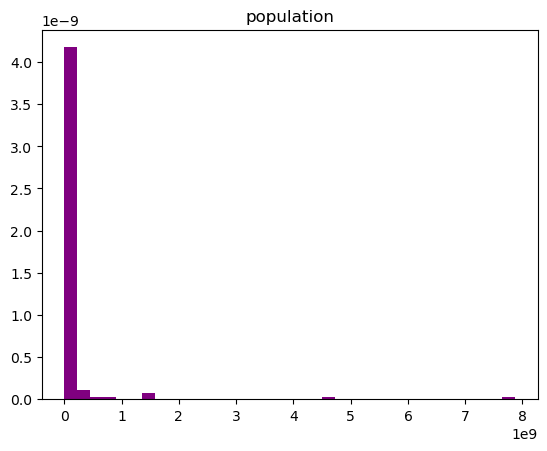

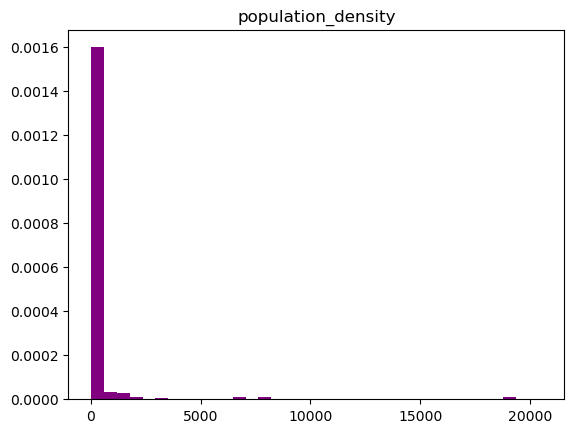

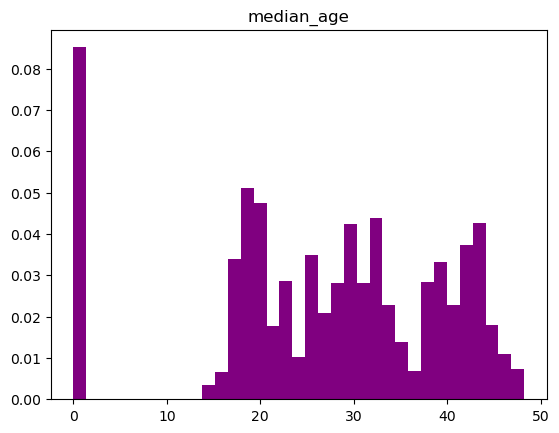

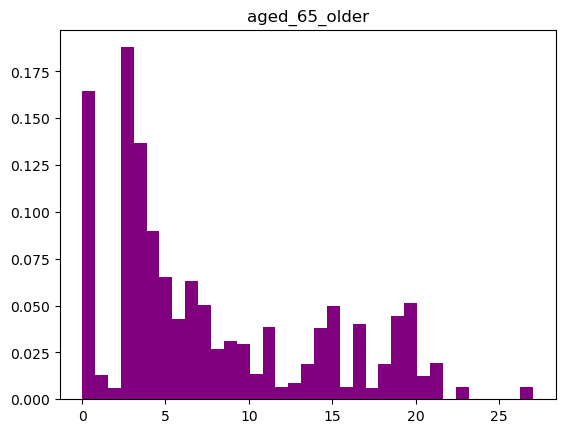

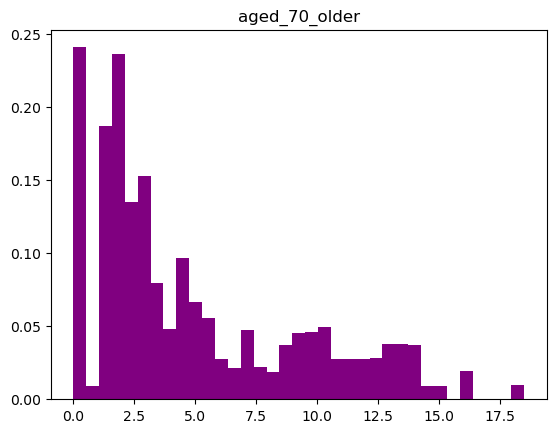

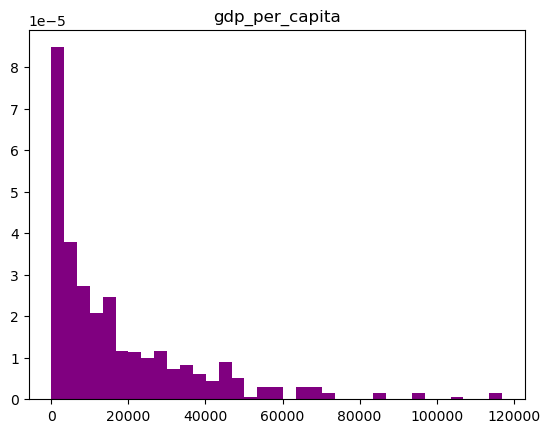

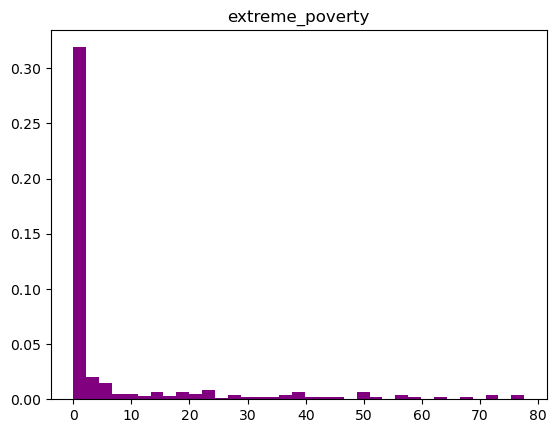

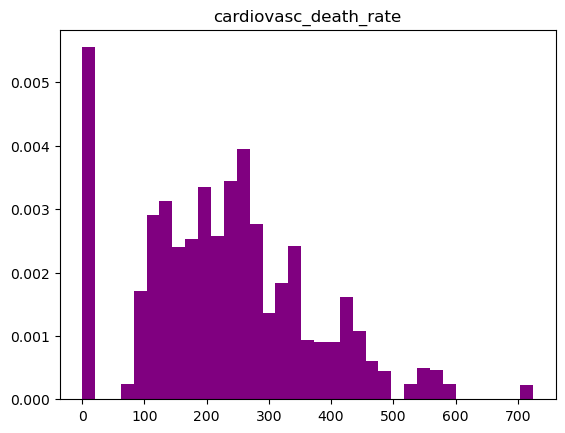

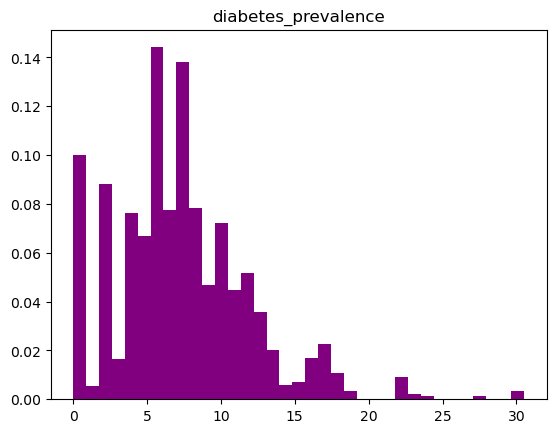

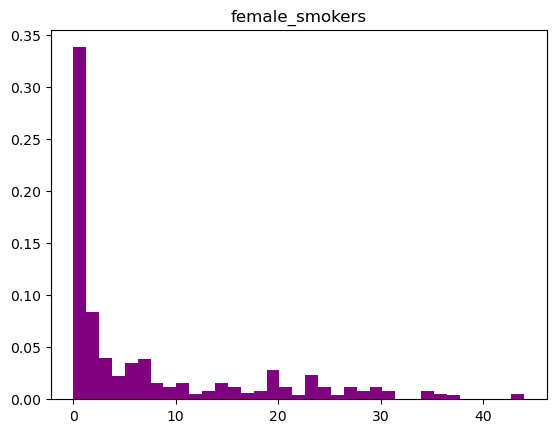

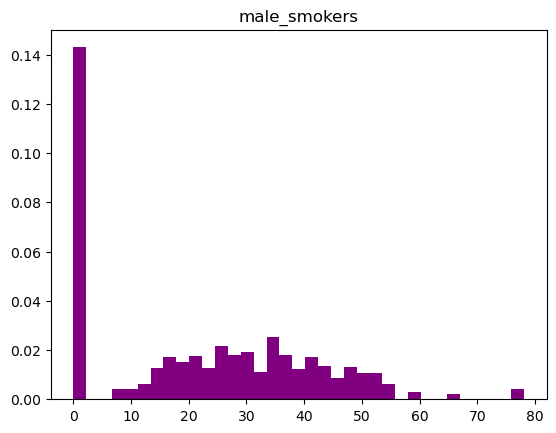

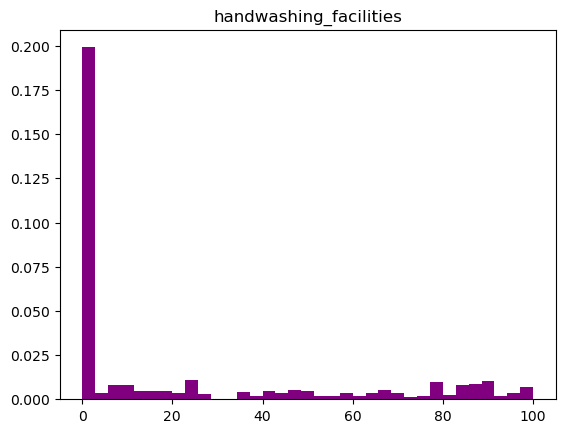

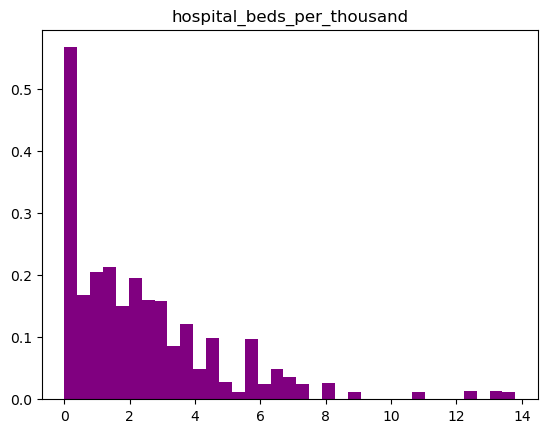

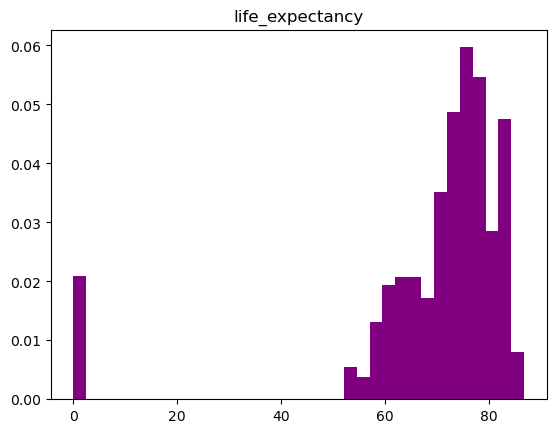

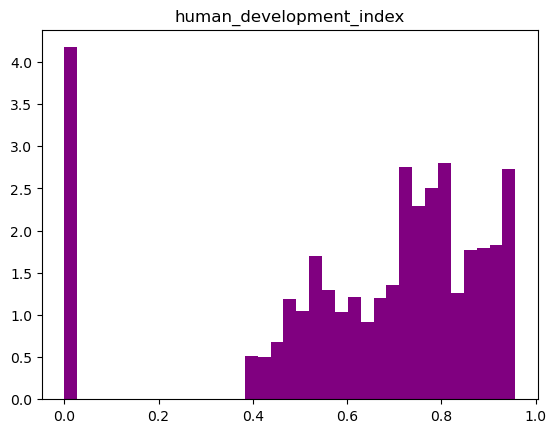

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

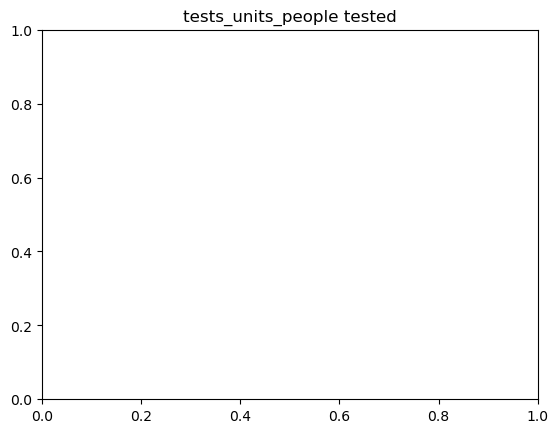

In [204]:
# визуализируем распределения атрибутов
for col in data_all.columns:
    # за исключением вспомогательных районов
    mpt.title(col)
    mpt.hist(data_all[col], density=True, 
                bins=35, color='purple')
    mpt.show();

# 1.5 Выгрузка данных

In [206]:
# Данные получение в результате преобразований
data_all.head(4)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,life_expectancy,human_development_index,tests_units_people tested,tests_units_samples tested,tests_units_tests performed,tests_units_units unclear,new_cases_4d,new_cases_prev_4d,Rt,target
0,5.0,5.0,0.0,0.0,0.0,0.0,0.126,0.126,0.0,0.0,...,64.83,0.511,False,False,True,False,0.0,0.0,0.0,2
1,5.0,0.0,0.0,0.0,0.0,0.0,0.126,0.000,0.0,0.0,...,64.83,0.511,False,False,True,False,0.0,0.0,0.0,2
2,5.0,0.0,0.0,0.0,0.0,0.0,0.126,0.000,0.0,0.0,...,64.83,0.511,False,False,True,False,0.0,0.0,0.0,2
3,5.0,0.0,0.0,0.0,0.0,0.0,0.126,0.000,0.0,0.0,...,64.83,0.511,False,False,True,False,5.0,0.0,0.0,2


In [209]:
data_all.to_csv("data_all.csv")